<a href="https://colab.research.google.com/github/sarasabino/Accident_Rate_Project/blob/main/Src/Notebooks/02_Exploratory_Staff_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Staff data

We are going to read all data we have on the staff data file. We are going to generate six df with the following data:

- employees_country --> number of employees per year and country
- int_empl_gender --> nº employees per year, country and gender
- int_empl_age --> nº employees per year, age range and gender
- int_empl_category --> nº employees per year, catgeory and gender
- ext_empl_genero --> nº employees per year and gender
- h_formacion --> nº trainning hours received by the employees per year and country

In [1]:
! cp /content/drive/MyDrive/'Colab Notebooks'/'TFM Accidentabilidad'/Data/Datos_plantilla.xlsx .

In [6]:
import pandas as pd

employees_country = pd.read_excel('Datos_plantilla.xlsx',sheet_name='tipo_empleados_pais')
employees_country.head()

,Año,País,Tipo contrato,Empleados
0,2018,México,Interno,154
1,2018,México,Externo,61
2,2018,EEUU,Interno,105
3,2018,EEUU,Externo,0
4,2018,Colombia,Interno,243


In [8]:
int_empl_gender = pd.read_excel('Datos_plantilla.xlsx',sheet_name='int_genero')
int_empl_gender.head()

,Año,País,Hombres,Mujeres
0,2018,Alemania,379,67
1,2018,Argentina,56,10
2,2018,Bégica,0,0
3,2018,Brasil,270,58
4,2018,China,256,49


In [10]:
int_empl_age = pd.read_excel('Datos_plantilla.xlsx',sheet_name='int_edad')
int_empl_age.head()

,Año,Rango edad,Hombres,Mujeres
0,2018,<30,1160,139
1,2018,30-50,2551,504
2,2018,>50,993,112
3,2019,<30,786,147
4,2019,30-50,1883,400


In [11]:
int_empl_category = pd.read_excel('Datos_plantilla.xlsx',sheet_name='int_categoria')
int_empl_category.head()


,Año,Categoria_laboral,Hombres,Mujeres
0,2018,Director,110,10
1,2018,Mando intermedio,541,122
2,2018,Personal planta,4133,1378
3,2019,Director,147,25
4,2019,Mando intermedio,497,122


In [12]:
ext_empl_genero = pd.read_excel('Datos_plantilla.xlsx',sheet_name='ext_genero')

ext_empl_genero.head()


,Año,Hombres,Mujeres
0,2018,787,53
1,2019,685,30
2,2017,496,75


In [14]:
h_formacion = pd.read_excel('Datos_plantilla.xlsx',sheet_name='h_formacion')
h_formacion.head()

,Año,Pais,Horas formacion
0,2018,Alemania,10043
1,2018,Argentina,0
2,2018,Bégica,0
3,2018,Brasil,13680
4,2018,China,10625


In [15]:
employees_country.head()

,Año,País,Tipo contrato,Empleados
0,2018,México,Interno,154
1,2018,México,Externo,61
2,2018,EEUU,Interno,105
3,2018,EEUU,Externo,0
4,2018,Colombia,Interno,243


In [17]:
empl_country_total = employees_country.groupby(['Año', 'País']).agg('sum')
empl_country_total = empl_country_total.reset_index()

empl_country_total.head()

,Año,País,Empleados
0,2017,Alemania,197
1,2017,Argentina,55
2,2017,Brasil,360
3,2017,China,245
4,2017,Colombia,255


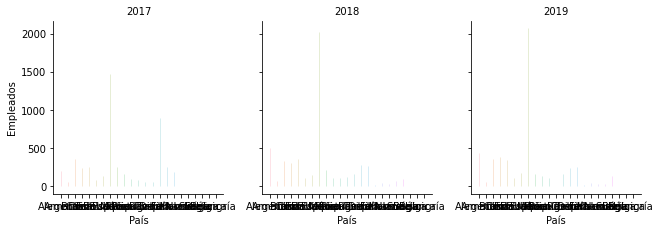

<Figure size 1440x288 with 0 Axes>

In [28]:
import seaborn as sns

import matplotlib.pyplot as plt


# Create a grid : initialize it
g = sns.FacetGrid(empl_country_total, col='Año', hue='País', col_wrap=4, )

# Add the line over the area with the plot function
g = g.map(plt.plot, 'País', 'Empleados')

# Fill the area with fill_between
g = g.map(plt.fill_between,'País', 'Empleados', alpha=0.2).set_titles("{col_name}")

# Control the title of each facet
g = g.set_titles("{col_name}")

# Add a title for the whole plo

plt.subplots_adjust(top=1.0)
plt.figure(figsize=(20,4))

plt.show()



In [40]:
x = empl_country_total[empl_country_total['Año'] == 2017]['País'].astype(str)
y = empl_country_total[empl_country_total['Año'] == 2017]['Empleados'].astype(int)

In [35]:
x2 = empl_country_total[empl_country_total['Año'] == 2018]['País']
y2 = empl_country_total[empl_country_total['Año'] == 2018]['Empleados']


x3 = empl_country_total[empl_country_total['Año'] == 2019]['País']
y3 = empl_country_total[empl_country_total['Año'] == 2019]['Empleados']

Text(0.5, 1.0, 'Nº employees 2019')

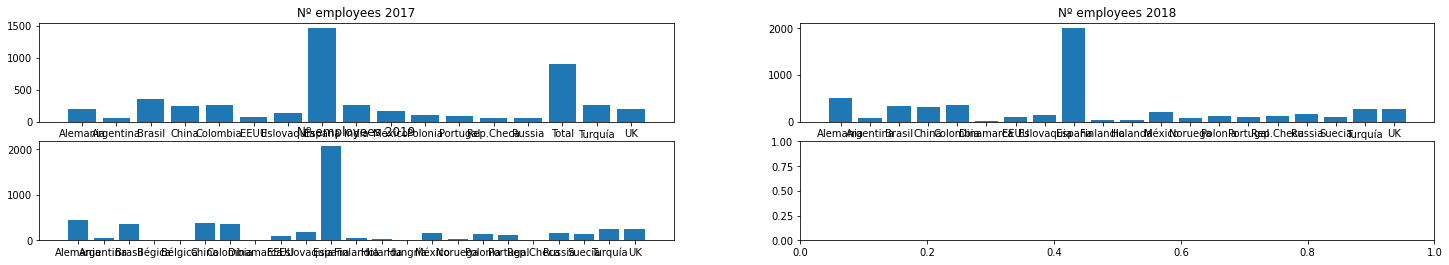

In [84]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(25,4))



axs[0, 0].bar(x, y)
axs[0, 0].set_title('Nº employees 2017')


axs[0, 1].bar(x2, y2)
axs[0, 1].set_title('Nº employees 2018')


axs[1, 0].bar(x3, y3)
axs[1, 0].set_title('Nº employees 2019')